**Classifying Dogs And Cats From The Given Dataset**

Subject : AI in Enterprise Systems

Mentor : Noopa Jagadeesh

Submited By : 


1.   Yash Shah (100812896)
2.   Karan Patel (100812891)
3.   Munjal Patel (100810810)





In [1]:
#extracting the given zip files

from zipfile import ZipFile

dir_train = ZipFile("train.zip","r").extractall()
dir_test = ZipFile("test1.zip", "r").extractall()

train_path = "./train"
test_path = "./test1"

In [2]:
#splitting the training files by their names and classifying them in two animal types (Dog & Cat) from their name

import os

fnames = os.listdir(train_path)
animal_type = []
for files in fnames:
    animal = files.split('.')[0]
    animal_type.append(animal)

In [3]:
#creating dataframe and showing sample dataframe

import pandas as pd

data_frame = pd.DataFrame({'Image': fnames, 'Animal': animal_type})
data_frame.sample(10)

,Image,Animal
3587,cat.5331.jpg,cat
21217,dog.10507.jpg,dog
24455,dog.10691.jpg,dog
20133,dog.10547.jpg,dog
2834,cat.7051.jpg,cat
12475,dog.7561.jpg,dog
10363,cat.8852.jpg,cat
10091,cat.5164.jpg,cat
12463,cat.4622.jpg,cat
2430,dog.6710.jpg,dog


In [4]:
#splitting dataframe into training and testing data

from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(data_frame, test_size=0.3, random_state=0)

print(df_train.shape)
print(df_valid.shape)

(17500, 2)
(7500, 2)


In [5]:
#generating training and validating data using ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from keras.preprocessing.image import img_to_array, load_img

dg_train = ImageDataGenerator(rescale=1./255, rotation_range=50,
                              width_shift_range=0.05, height_shift_range=0.05,
                              shear_range=0.2, zoom_range=0.15,
                              horizontal_flip=True, fill_mode='nearest')
dg_valid = ImageDataGenerator(rescale=1./255)

In [6]:
#Augmenting Data so that it has sufficient number and variety of training examples. 
#Data augmentation takes the approach of generating more training data from existing training samples, 
#by augmenting the samples through random transformations that yield believable-looking images. 

aug_train = dg_train.flow_from_dataframe(df_train, directory=train_path, 
                                             x_col='Image', y_col='Animal',
                                             target_size=(224, 224), class_mode='binary',
                                             batch_size=64)

aug_valid = dg_valid.flow_from_dataframe(df_valid, directory=train_path,
                                             x_col='Image', y_col='Animal',
                                             target_size=(224, 224), class_mode='binary',
                                             batch_size=64)

Found 17500 validated image filenames belonging to 2 classes.
Found 7500 validated image filenames belonging to 2 classes.


In [7]:
#Defining and Building The Model

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Flatten, Dropout, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#initialling modeling with sequencial model
mdl = Sequential()

#First convolutional layer with relu activation 
mdl.add(Conv2D(filters=32, kernel_size=3,activation="relu", input_shape=(224,224,3)))
#following max pooling operation for first convolutional layer
mdl.add(MaxPool2D(pool_size=2, strides=2))
mdl.add(Dropout(0.2))

#second convolutional layer with relu activation
mdl.add(Conv2D(filters=64, kernel_size=3,activation="relu"))
#following max pooling operation for second convolutional layer
mdl.add(MaxPool2D(pool_size=2, strides=2))
mdl.add(Dropout(0.2))

#third convolutional layer with relu activation
mdl.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
#following max pooling operation for third convolutional layer
mdl.add(MaxPool2D(pool_size=2, strides=2))
mdl.add(Dropout(0.2))

#flattening the output of CNN to create single feature vector
mdl.add(Flatten())

#finally dense layer with relu and sigmoid activation function
mdl.add(Dense(units=512, activation="relu"))
mdl.add(Dense(units=1, activation="sigmoid"))

In [8]:
#model summary

mdl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [9]:
#compiling the model

mdl.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [10]:
#training the model

callback=EarlyStopping(monitor="val_loss", patience=4)
history=mdl.fit(aug_train, validation_data=aug_valid, epochs=15,callbacks=[callback])

Epoch 1/15
274/274 [==============================] - 286s 880ms/step - loss: 1.1720 - accuracy: 0.5234 - val_loss: 0.6808 - val_accuracy: 0.5675
Epoch 2/15
274/274 [==============================] - 238s 870ms/step - loss: 0.6787 - accuracy: 0.5773 - val_loss: 0.6395 - val_accuracy: 0.6424
Epoch 3/15
274/274 [==============================] - 236s 862ms/step - loss: 0.6418 - accuracy: 0.6252 - val_loss: 0.5622 - val_accuracy: 0.7025
Epoch 4/15
274/274 [==============================] - 237s 865ms/step - loss: 0.5615 - accuracy: 0.7061 - val_loss: 0.5043 - val_accuracy: 0.7459
Epoch 5/15
274/274 [==============================] - 237s 863ms/step - loss: 0.5223 - accuracy: 0.7385 - val_loss: 0.4925 - val_accuracy: 0.7605
Epoch 6/15
274/274 [==============================] - 237s 865ms/step - loss: 0.5073 - accuracy: 0.7523 - val_loss: 0.4754 - val_accuracy: 0.7696
Epoch 7/15
274/274 [==============================] - 238s 870ms/step - loss: 0.4795 - accuracy: 0.7702 - val_loss: 0.4628 -

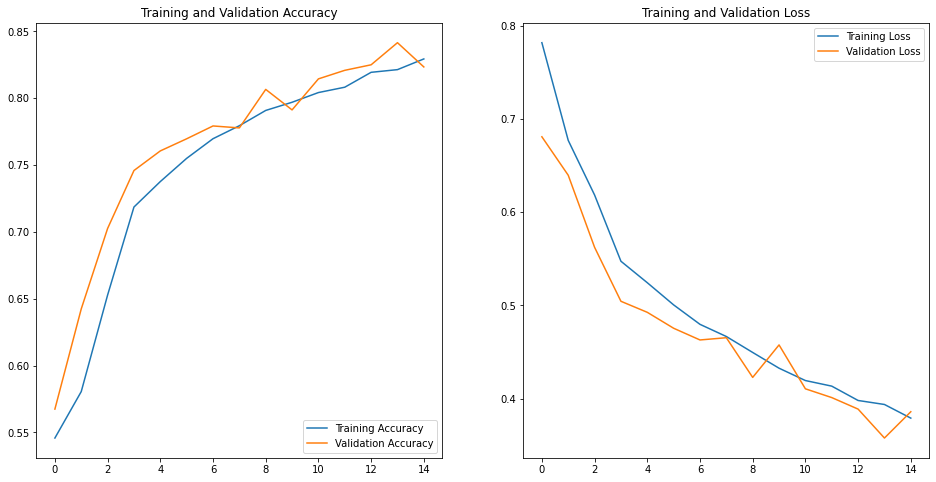

In [11]:
#visualising the results of trained model
#checking accuracy and lost of training and validating data

import matplotlib.pyplot as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
file_names = os.listdir(test_path)
df_test = pd.DataFrame({'Image':file_names})

df_test.sample(10)

,Image
1793,10150.jpg
4997,127.jpg
10396,6062.jpg
96,11307.jpg
2724,5200.jpg
7308,9766.jpg
9595,6388.jpg
1673,9511.jpg
3402,3245.jpg
6595,6968.jpg


In [13]:
#defining testing data

aug_test = dg_valid.flow_from_dataframe(df_test, directory=test_path, x_col='Image',
                                             y_col=None, class_mode=None, target_size= (224, 224),
                                             batch_size=64, shuffle=False)

Found 12500 validated image filenames.


In [14]:
#building the prediction model

pred = mdl.predict(aug_test)
pred = np.where(pred > 0.5, 'Dog', 'Cat')

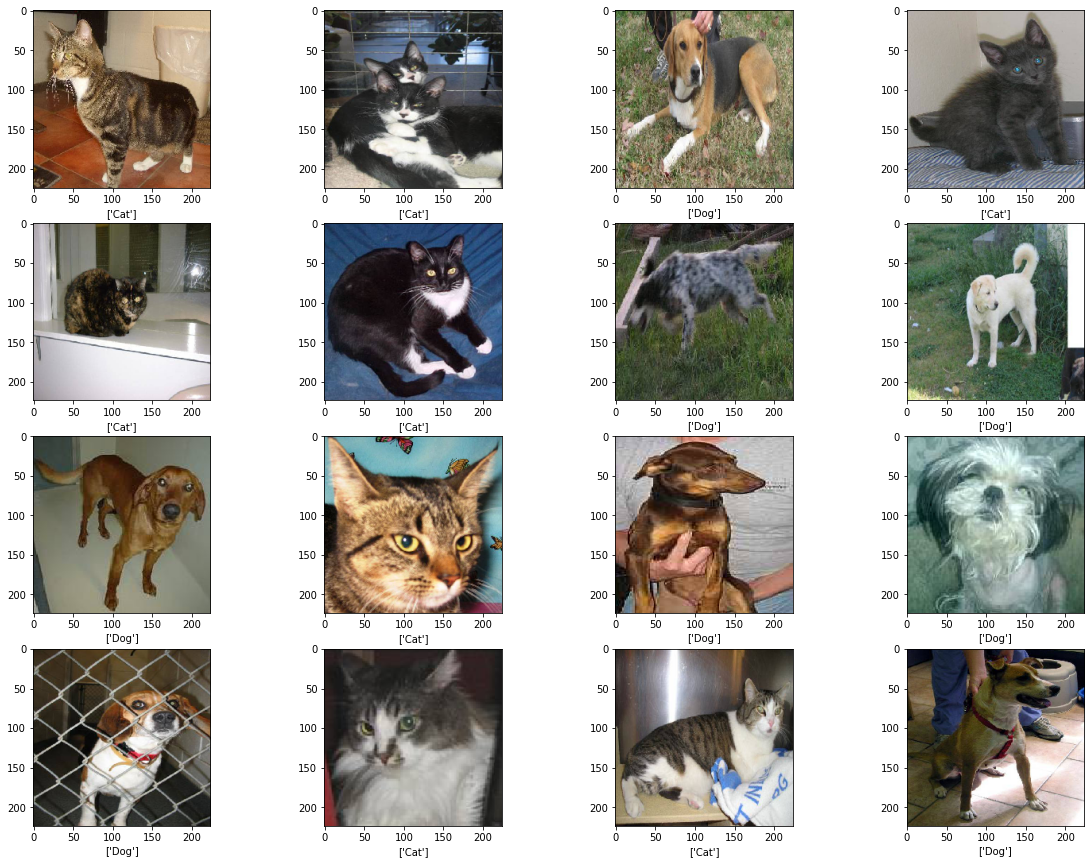

In [15]:
#predicting the results

plt.figure(figsize=(20,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(aug_test[0][i])
    plt.xlabel(pred[i])
    
plt.show()